In [1]:
import os
import hydromt
from hydromt_sfincs import SfincsModel
from hydromt.config import configread
from rasterio.features import shapes
from shapely.geometry import shape
import numpy as np
import geopandas as gpd
from affine import Affine



In [2]:
# !hydromt --models

In [3]:
def get_local_vector_data(file, bbox):
    dataCat = hydromt.data_catalog.DataCatalog('..\datacatalog_general.yml')
    vector = dataCat.get_geodataframe(
        data_like = file,
        bbox=  bbox)
    return vector

In [4]:
modelname = 'sfincs_CLI_Freddy2_v2'

In [5]:
dir_run = os.path.join('..','sfincs_sofala','computations',modelname)


In [ ]:
if modelname == 'sfincs_CLI_Idai':
    !hydromt build sfincs ../sfincs_sofala/computations/sfincs_CLI_Idai --region "{'interbasin': [34.33,-20.12,34.95,-19.30]}" -i sfincs_base_build.yml --force-overwrite -v
elif modelname == 'sfincs_CLI_Freddy2_v2':
    !hydromt build sfincs ../sfincs_sofala/computations/sfincs_CLI_Freddy2 --region "{'bbox': [36.7,-18.35,37.41,-17.64]}" -i sfincs_base_build.yml --force-overwrite -v

# can the folder name in the command above be written based on the variable modelname?

# For more information on command line available options, type:
# !hydromt build --help

In [30]:
opt = configread("sfincs_base_build.yml", abs_path=True)  # read settings from ini file
kwargs = opt.pop("global", {})
model_root = "../sfincs_sofala/computations/sfincs_CLI_Freddy2"
bbox = [36.68,-18.35,37.41,-17.64]
region = get_local_vector_data(
    file = 'basin_atlas_level12_v10',
    bbox = bbox,
)

mod = SfincsModel(
    root=model_root, mode="w+", **kwargs
)
opt['setup_mask_active']['mask'] = region

# %% BUILD MODEL
mod.build(region={"geom": region}, opt=opt)

The nodata value None is not in the reclass table.None will be used for the params.


In [ ]:
mod.data_catalog

ConstructorError: could not determine a constructor for the tag 'tag:yaml.org,2002:python/object/new:rasterio.crs.CRS'
  in "c:\Git_repos\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_CLI_Freddy2\hydromt_data.yml", line 74, column 8

In [ ]:
model_root = "../sfincs_sofala/computations/sfincs_CLI_Freddy2"

mod = SfincsModel(
    root=model_root, mode="r+", **kwargs
)

mod.read()
opt['setup_river_inflow']['buffer'] = 500
mod.update(write=True, opt=opt)


The nodata value None is not in the reclass table.None will be used for the params.


TypeError: SfincsModel.setup_river_inflow() got an unexpected keyword argument 'buffer'

In [ ]:
region.to_file(r'c:\Git_repos\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_CLI_Freddy2\gis\test.geojson')
# region.plot()

In [6]:
# remove hydromt_data.yml that causes errors in the next step
os.remove(os.path.join(dir_run,'hydromt_data.yml'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '..\\sfincs_sofala\\computations\\sfincs_CLI_Freddy2_v2\\hydromt_data.yml'

In [7]:
if modelname == 'sfincs_CLI_Idai':
    !hydromt update sfincs ../sfincs_sofala/computations/sfincs_CLI_Idai -i sfincs_Idai_forcing.yml -v
elif modelname == 'sfincs_CLI_Freddy2_v2':
    !hydromt update sfincs ../sfincs_sofala/computations/sfincs_CLI_Freddy2 -i sfincs_Freddy2_forcing.yml -v


2024-11-14 14:27:42,982 - update - log - INFO - HydroMT version: 0.9.4
2024-11-14 14:27:42,982 - update - main - INFO - Updating sfincs model at C:\Git_repos\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_CLI_Freddy2 (r+).
2024-11-14 14:27:42,982 - update - main - INFO - Output dir: C:\Git_repos\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_CLI_Freddy2
2024-11-14 14:27:42,982 - update - main - INFO - User settings:


Traceback (most recent call last):
  File "c:\Users\bovensch\miniforge3\envs\compass\Scripts\hydromt-script.py", line 9, in <module>
    sys.exit(main())
             ^^^^^^
  File "c:\Users\bovensch\miniforge3\envs\compass\Lib\site-packages\click\core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bovensch\miniforge3\envs\compass\Lib\site-packages\click\core.py", line 1078, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "c:\Users\bovensch\miniforge3\envs\compass\Lib\site-packages\click\core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bovensch\miniforge3\envs\compass\Lib\site-packages\click\core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bovensch\miniforge3\envs\compass\Lib\sit

In [ ]:
dir_list = os.listdir(dir_run)
print(dir_list)

['gis', 'hydromt.log', 'sfincs.ind', 'sfincs.inp', 'sfincs.msk', 'sfincs.scs', 'sfincs_subgrid.nc', 'subgrid']


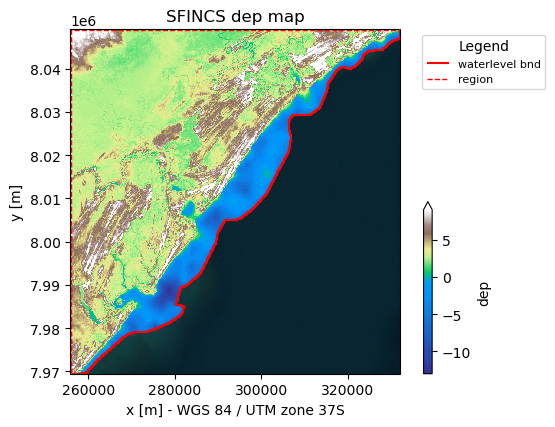

In [ ]:
# read the model with hydromt methods
sf = SfincsModel(root=dir_run, mode="r")
sf.read()

# plot the model with satelite basemap (see hydromt_sfincs.plot_basemap for more options)
_ = sf.plot_basemap(plot_region=True, bmap="sat", zoomlevel=12)

In [10]:
#  create a bat file to run the model on windows
batch_content = 'call "p:/11210471-001-compass/02_Models/00_executables/SFINCS_v2.1.1_Dollerup_release_exe/sfincs.exe" > sfincs_log.txt'

file_name = 'run_sfincs.bat'
with open(os.path.join(dir_run, file_name), "w") as file:
    file.write(batch_content)